- Name:Beili Li

# problem 1

### 2. Unsupervised Nearest Neighbor

* in this part we do not have lable y just find neighbors based on Euclidean distance
* The 2 nearest neighbor of point(5,5) are point with index(90,85) and with the shortest Euclidean distance=(0.72,1.81) prespectively.
* then we find the nearest neighbors from the original sample data with the index and marke the green point which is point(5,5) and its 2 nearest neighbors (orange point)
* the nearest neighbors are usually the points surround the target point 

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.neighbors import NearestNeighbors
from sklearn.datasets import make_blobs

In [65]:
nn = NearestNeighbors(n_neighbors=2, algorithm='ball_tree')

In [66]:
X,_ = make_blobs(n_features=2, n_samples=100, cluster_std=5)

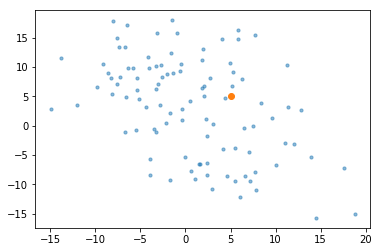

In [67]:
plt.scatter(X[:,0], X[:,1], s=10,alpha=.5)
plt.scatter([5],[5])

In [68]:
nn.fit(X)

NearestNeighbors(algorithm='ball_tree', leaf_size=30, metric='minkowski',
         metric_params=None, n_jobs=None, n_neighbors=2, p=2, radius=1.0)

In [69]:
nn.kneighbors([[5,5]])

(array([[0.72382074, 1.80714779]]), array([[90, 85]]))

In [70]:
_,X_nearest = nn.kneighbors([[5,5]])

In [71]:
nearest = X[X_nearest[0]] 

In [72]:
X_nearest

array([[90, 85]])

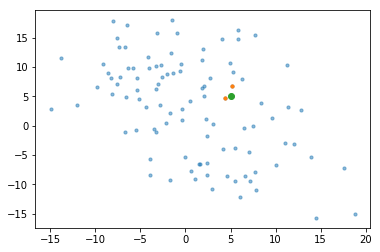

In [73]:
plt.scatter(X[:,0], X[:,1], s=10,alpha=.5)
plt.scatter(nearest[:,0], nearest[:,1], s=10 ,cmap='virdis')
plt.scatter([5],[5])

### 3. Nearest Neighbors for Classification
* Neighbors-based classification is a type of instance-based learning method. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.
* In this part we use Two types of nearest neighbor classifier
 - KNeighboursClassifier ( based on configured k )
 - RadiusNeighbourClassifier ( based on configured r )
 
 

In [137]:
from sklearn.neighbors import KNeighborsClassifier,RadiusNeighborsClassifier

In [330]:
knc = KNeighborsClassifier(n_neighbors=5)
rnc = RadiusNeighborsClassifier(radius=5)

In [334]:
X,Y = make_blobs(n_features=2, n_samples=50, cluster_std=5, centers=2)


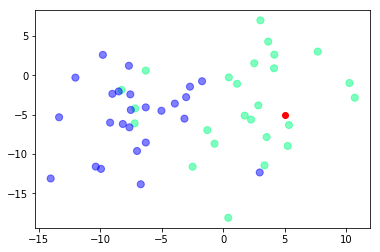

In [140]:
plt.scatter(X[:,0], X[:,1], s=50,alpha=.5, c=Y, cmap='winter')
plt.scatter([5],[-5],c='r')

In [141]:
knc.fit(X,Y)
rnc.fit(X,Y)

RadiusNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=None, outlier_label=None, p=2,
             radius=5, weights='uniform')

In [142]:
knc_pred = knc.predict([[5,-5]])

* the predicted lable for point(5,-5) under KNC is y=1
* in KNC model we set K=5
  - the neighbors' index for point(5,-5) under KNC is 5 points their index are [45, 49, 44,  2, 35]

In [143]:
knc_pred

array([1])

In [144]:
knc.kneighbors([[5,-5]])

(array([[1.36533119, 2.44610565, 2.81617732, 3.2092572 , 3.26129231]]),
 array([[45, 49, 44,  2, 35]]))

In [145]:
_, knc_neighbors = knc.kneighbors([[5,-5]])

In [146]:
knc_neighbors

array([[45, 49, 44,  2, 35]])

In [147]:
rnc_pred = rnc.predict([[5,-5]])

* the predicted lable under RNC for point(5,-5) is y=1
* in RNC model we set r=5  
  - the neighbors' index for point(5,-5) under RNC is 6 points their index are [ 2, 19, 35, 44, 45, 49]
  

In [148]:
rnc_pred

array([1])

In [149]:
rnc.radius_neighbors([[5,-5]])

(array([array([3.2092572 , 3.99203512, 3.26129231, 2.81617732, 1.36533119,
        2.44610565])], dtype=object),
 array([array([ 2, 19, 35, 44, 45, 49])], dtype=object))

In [150]:
_, rnc_neighbors = rnc.radius_neighbors([[5,-5]])

In [151]:
rnc_neighbors[0]

array([ 2, 19, 35, 44, 45, 49])

* under the uniform weights all points in each neighborhood are weighted equally.
* in the case if the data is not uniformly sampled, RNC has a better classification results (usulay with more neighbors)
* under low dimension and sparse data RNC classifys based on the number of neighbors within a fixed radius and that points in sparser neighborhoods use fewer nearest neighbors for the classification
* from 2 plot we can see all the neighbor are green points either under KNC or RNC, but RNC with more neighbors

#### Visualizing for NearestNeighbourClassifier

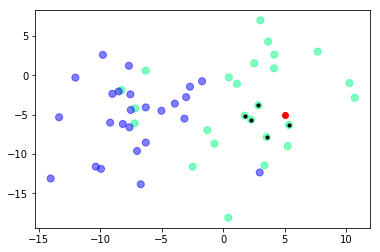

In [152]:
nearest = X[knc_neighbors[0]]
plt.scatter(X[:,0], X[:,1], s=50,alpha=.5, c=Y, cmap='winter')
plt.scatter([5],[-5],c='r')
plt.scatter(nearest[:,0], nearest[:,1], s=10, c='k')

#### Visualizing for RadiusNeighbourClassifier

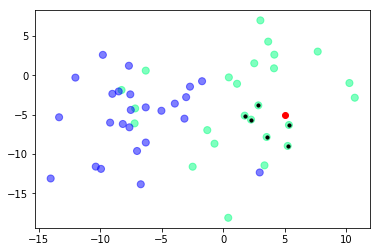

In [153]:
nearest = X[rnc_neighbors[0]]
plt.scatter(X[:,0], X[:,1], s=50,alpha=.5, c=Y, cmap='winter')
plt.scatter([5],[-5],c='r')
plt.scatter(nearest[:,0], nearest[:,1], s=10, c='k')

In [46]:
rnc = RadiusNeighborsClassifier(radius=5, weights='distance')

# problem 2

* (a)

In [501]:
import numpy as np
import seaborn as sns; sns.set()
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import random 

In [632]:
np.random.seed(0)
d = 3
n=30000
mean1 = np.array([0,-1,1])
mean2= np.array([0,-3,3])
cov=np.identity(3)
x1 = np.random.multivariate_normal(mean=mean1, cov=cov, size=n)
x2 = np.random.multivariate_normal(mean=mean2, cov=cov, size=n)
y1=random.choices(range(0,1), k=n)
y2=random.choices(range(1,2), k=n)
y1=np.array(y1).reshape(n,1)
y2=np.array(y2).reshape(n,1)
train_x=np.concatenate((x1, x2), axis=0)
train_y=np.concatenate((y1,y2),axis=0)


(b)
* Plot the sample of X1 and X2
 - the red dots are sample 1 
 - the green dots are sample 2 

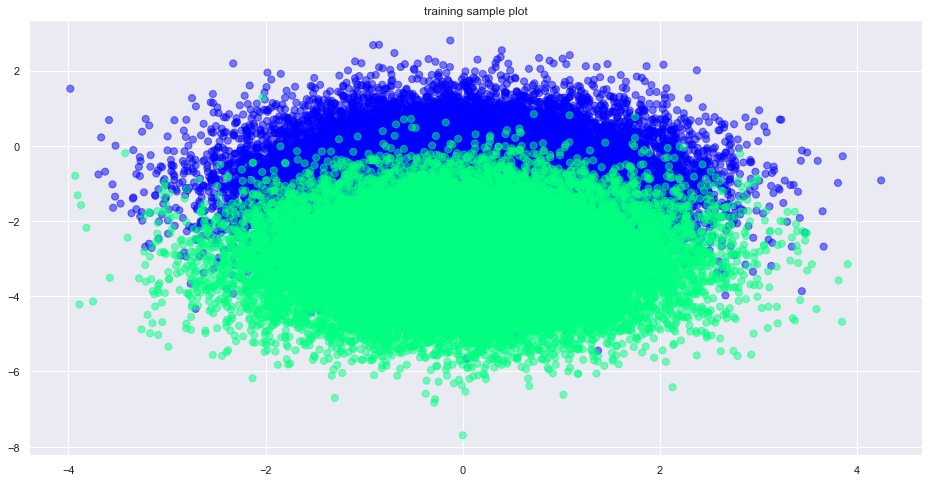

In [503]:
plt.figure(figsize=(16,8))
plt.scatter(train_x[:,0], train_x[:,1], s=50,alpha=.5, c=train_y[:,0], cmap='winter')
plt.title('training sample plot')
plt.show()

(c) Generate 10, 000 synthetic samples for test.

In [633]:
np.random.seed(2)
n=5000
test_x1=np.random.multivariate_normal(mean1,cov,size=n)
test_x2=np.random.multivariate_normal(mean2,cov,size=n)
test_y1=random.choices(range(0,1), k=5000)
test_y2=random.choices(range(1,2), k=5000)
test_y1=np.array(test_y1).reshape(5000,1)
test_y2=np.array(test_y2).reshape(5000,1)
test_x=np.concatenate((test_x1, test_x2), axis=0)
test_y=np.concatenate((test_y1,test_y2),axis=0)

* plot test sample 

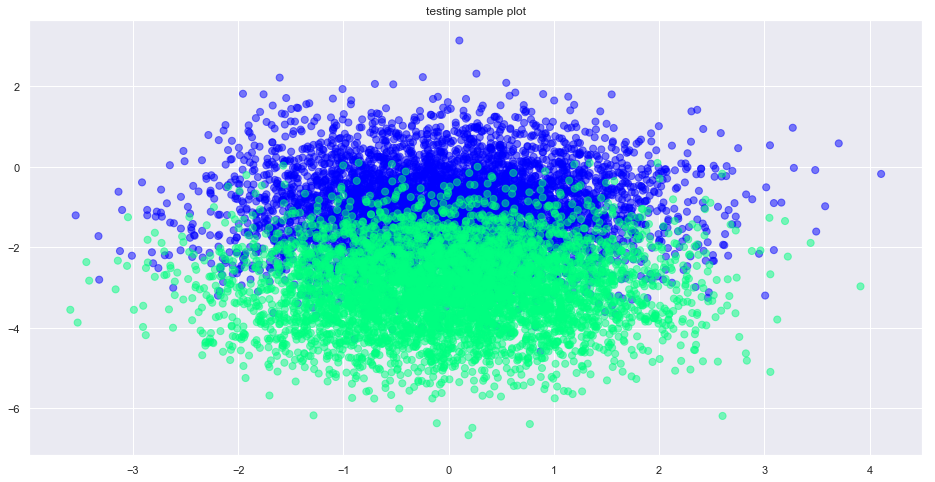

In [376]:
plt.figure(figsize=(16,8))
plt.scatter(test_x[:,0], test_x[:,1], s=50,alpha=.5, c=test_y[:,0], cmap='winter')
plt.title('testing sample plot')
plt.show()

(d) Apply K-NN algorithm with k = 1 on the test samples.Compare it with the error rate of Maximum Likelihood Estimator (MLE) with optimal threshold.

* implement K-NN for training sample and predict it under test sample, the error rate for testing data under k=1 is 11.21%

In [505]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier(n_neighbors=1)
knc.fit(train_x,train_y[:,0])


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=1, p=2,
           weights='uniform')

In [506]:
knc_pred = knc.predict(test_x)
distance, knc_neighbors = knc.kneighbors(test_x)

* Visualizing for NearestNeighbourClassifier

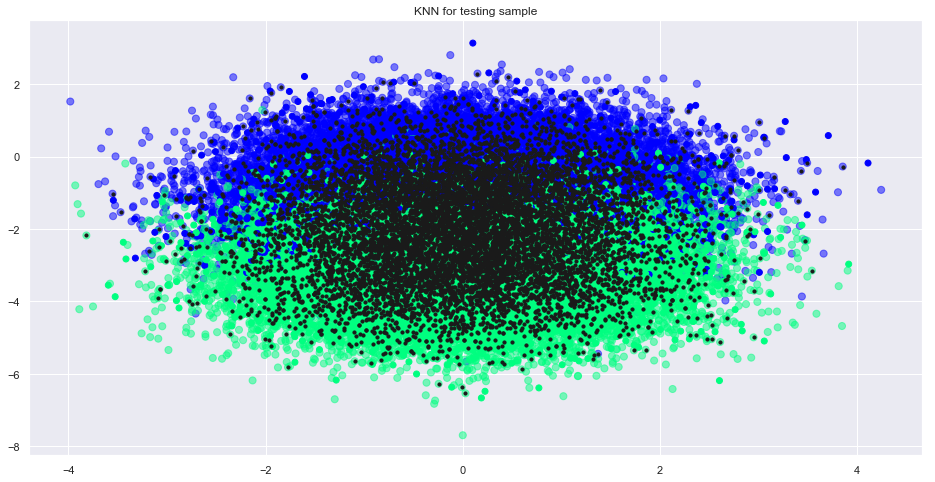

In [386]:
nearest = train_x[knc_neighbors[:,0]]
plt.figure(figsize=(16,8))
plt.scatter(train_x[:,0], train_x[:,1], s=50,alpha=.5, c=train_y[:,0], cmap='winter')
plt.scatter(test_x[:,0],test_x[:,1],c=test_y[:,0],cmap='winter')
plt.scatter(nearest[:,0], nearest[:,1], s=10, c='k')
plt.title('KNN for testing sample')
plt.show()

* Compute the classification error of KNN for the test sample

In [507]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(test_y[:,0],knc_pred))

[[4406  594]
 [ 527 4473]]


In [510]:
print(classification_report(test_y[:,0],knc_pred))
error=np.mean(knc_pred != test_y[:,0])
print('the error rate for k=1 under K-NN is {}%'.format(error*100))

              precision    recall  f1-score   support

           1       0.89      0.88      0.89      5000
           2       0.88      0.89      0.89      5000

   micro avg       0.89      0.89      0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000

the error rate for k=1 under K-NN is 11.21%


* for the MLE model we use linear discriminant analysis with optimal threshold p=0.586, the error rate is 7.8% which is smaller than the K-NN error rate 11.21%

In [634]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import roc_curve,roc_auc_score
from numpy import sqrt
from numpy import argmax
from matplotlib import pyplot
import warnings
warnings.filterwarnings("ignore")

In [635]:
lda=LinearDiscriminantAnalysis()
lda.fit(train_x,train_y[:,0])
lda_pred = lda.predict(test_x)
print(classification_report(test_y[:,0],lda_pred))


              precision    recall  f1-score   support

           0       0.92      0.92      0.92      5000
           1       0.92      0.92      0.92      5000

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



In [637]:
log_pro=lda.predict_proba(test_x)[:,1]
#preds = np.where(log_pro > 0.6, 2, 1)
fpr, tpr,thresholds =roc_curve(test_y[:,0],log_pro)
gmeans =sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = argmax(gmeans)
print('Best Threshold=%f, Error rate=%.3f' % (thresholds[ix], 1-gmeans[ix]))

Best Threshold=0.586104, Error rate=0.078


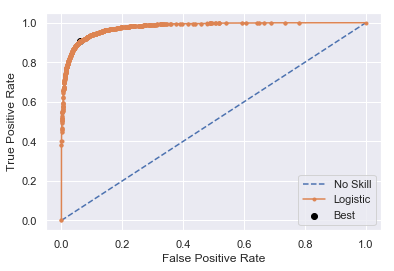

In [638]:
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

(e) Repeat last step for k = 2,3,...,10 and plot the error rate pe against k Is the error rate decreases with k? Should the error rate always decrease with k?

* plot the k VS error rate in figure1 and figure2
* increase k from 1 to 10 we can see the error rate is decreasing with minimum error rate k=10(figure1)
* increase K from 10 to 20 the error rate will not always decrease when k=18 we have minimum error rate=0.0801(figure2)

In [395]:
# wirte function to record error rate for different k(number of neighbors)
def rate(k):
    error_rate=[]    
    for i in range(1,k+1):    
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(train_x,train_y[:,0])
        pred_i = knn.predict(test_x)
        error_rate.append(np.mean(pred_i != test_y[:,0]))
    return error_rate   

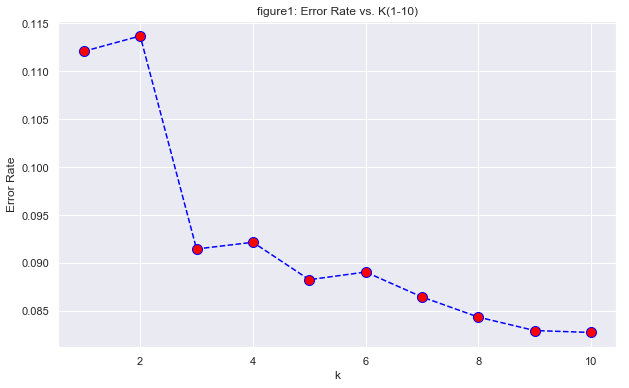

In [419]:
k=10
plt.figure(figsize=(10,6))
plt.plot(range(1,k+1,1),rate(k),color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('figure1: Error Rate vs. K(1-{})'.format(k))
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

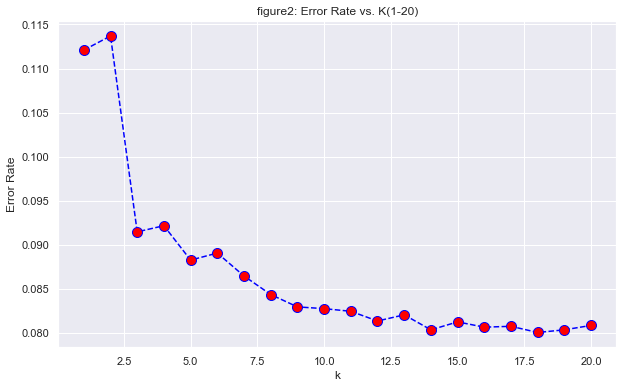

In [420]:
k=20
plt.figure(figsize=(10,6))
plt.plot(range(1,k+1),rate(k),color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('figure2: Error Rate vs. K(1-{})'.format(k))
plt.xlabel('k')
plt.ylabel('Error Rate')
plt.show()

In [421]:
min_k=rate(k=20).index(min(rate(k=20)))+1
print('the minimum error rate is k={}'.format(min_k))

the minimum error rate is k=18


(f) Let m be the number of training samples. Fix k and n, and plot the error rate as a function of m. How do you expect the graph to behave?

For figure3
* we fixed k=1 number of test sample=300 and increase number of training sample m from 1000 to 10000 with step=100 each time. 
 - the error rate fluctuates with the increase of training size and under small size(m<2000) the error rate increaes 
 - there is a smallest error rate for the samll traning size with fixed k and n 

In [479]:
# function to generate training sample data
def generate_sample_num(n):
    np.random.seed(2)
    d = 3
    mean1 = np.array([0,-1,1])
    mean2= np.array([0,-3,3])
    cov=np.identity(3)
    test_x1=np.random.multivariate_normal(mean1,cov,size=n)
    test_x2=np.random.multivariate_normal(mean2,cov,size=n)
    test_y1=random.choices(range(1,2), k=n)
    test_y2=random.choices(range(2,3), k=n)
    test_y1=np.array(test_y1).reshape(n,1)
    test_y2=np.array(test_y2).reshape(n,1)
    test_x=np.concatenate((test_x1, test_x2), axis=0)
    test_y=np.concatenate((test_y1,test_y2),axis=0)
    return (test_x,test_y)

In [482]:
# function to generate KNN model for traning and testing data with sample size m,n and neighbor k
def model_error(m,k,n):
    (train_x,train_y)=generate_sample_num(m)
    (test_x,test_y)=generate_sample_num(n)
    error_rate=[]    
    for i in range(1,k+1):    
        knn = KNeighborsClassifier(n_neighbors=i)
        knn.fit(train_x,train_y[:,0])
        pred_i = knn.predict(test_x)
        error_rate.append(np.mean(pred_i != test_y[:,0]))
    return error_rate  

In [469]:
# functio to record the error rate with change of i(the size of traning sample )
def error_sample_num(i,k,n):
    error_record=[]
    for m in range(1000,i,100):
        c=np.min(model_error(m,k,n))
        error_record.append(c)
    return error_record    


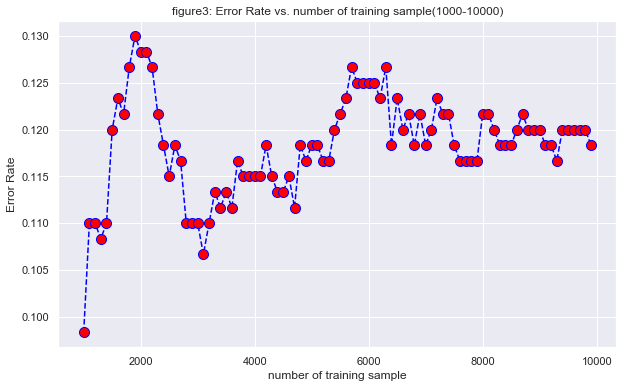

In [443]:
i=10000
y=error_sample_num(i=10000,k=1,n=300)
plt.figure(figsize=(10,6))
plt.plot(range(1000,i,100),y,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('figure3: Error Rate vs. number of training sample(1000-{})'.format(i))
plt.xlabel('number of training sample')
plt.ylabel('Error Rate')
plt.show()

For figure 4 
* we fixed k=10,n=300 and increase number of training sample m from 1000 to 10000 with step=100 each time. 
 - with k>1, we use minimum erre rate tp presente the error rate under k=10
 - the error rate fluctuates with the increase of training size and reaches smallest error rate when m=1700 in my experiement
 - there will be smaller change of error rate if m is big enough

In [471]:
m=10000
y=error_sample_num(10000,k=10,n=3000)

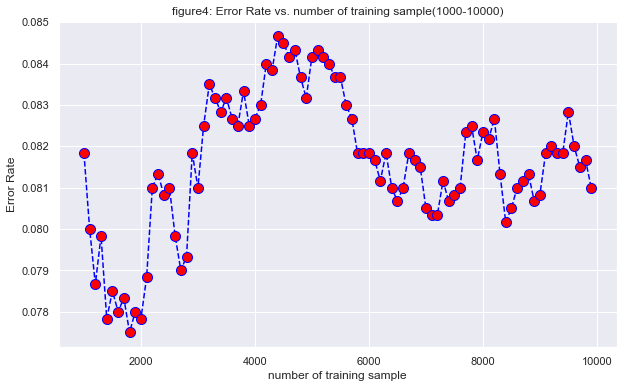

In [628]:
m=10000
plt.figure(figsize=(10,6))
plt.plot(range(1000,m,100),y,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('figure4: Error Rate vs. number of training sample(1000-{})'.format(m))
plt.xlabel('number of training sample')
plt.ylabel('Error Rate')
plt.show()

(g) 

* the distance metric will affect the error rate but the influence is fluctuation with p increasing. 
* the smallest error rate for training size=60000, test size=5000, and k=10 is under p=2 which is the Eculidiean distance. 


In [487]:
def rate_dis2(p):
    error_rate=[]    
    for i in range(1,p+1):  
        test_x,test_y=generate_sample_num(n=5000)
        train_x,train_y=generate_sample_num(n=30000)
        knn = KNeighborsClassifier(n_neighbors=10,p=i)
        knn.fit(train_x,train_y[:,0])
        pred_i = knn.predict(test_x)
        error_rate.append(np.mean(pred_i != test_y[:,0]))
    return error_rate  

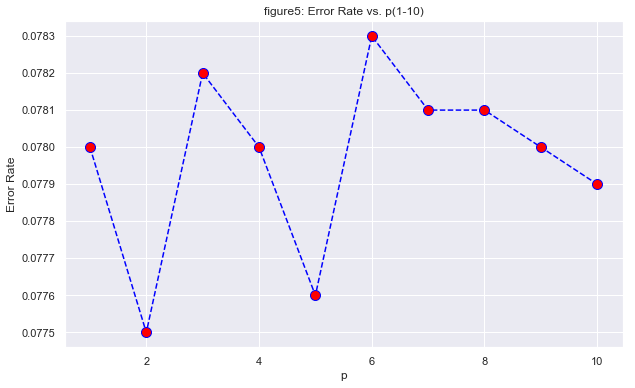

In [629]:
p=10
plt.figure(figsize=(10,6))
plt.plot(range(1,p+1),rate_dis2(p),color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('figure5: Error Rate vs. p(1-{})'.format(p))
plt.xlabel('p')
plt.ylabel('Error Rate')
plt.show()